<a href="https://colab.research.google.com/github/rubygitflow/Higher-Math/blob/main/University_of_Artificial_Intelligence_Basic_Mathematics_Lesson_8_Metric_spaces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Лекция**

In [43]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
from scipy import spatial 

Экспериментируем с евклидовым пространством

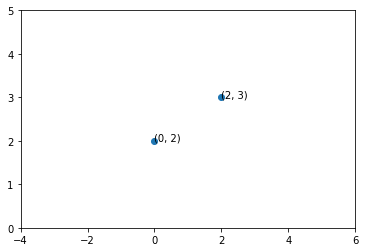

In [44]:
#Нарисуем 2 точки на плоскости с коорлинатами (0,2) и (2,3)
data = np.array([[0,2],[2,3]])
plt.margins(2, 2)   # Шкалируем оси
plt.scatter(data[:,0],data[:,1])
for i_x, i_y in data:
    plt.text(i_x, i_y, '({}, {})'.format(i_x, i_y)) #Добавляем подписи
plt.show()

In [45]:
#Теперь посчитаем расстояние между ними, воспользовавшись формулой: d = sqrt(Summ(p-q)^2)
def euclid(p,q):
  d = []
  for p_i, q_i in zip(p,q):
    d.append((p_i - q_i)**2)
  return np.sqrt(sum(d))

euclid(data[:,0],data[:,1])

2.23606797749979

In [46]:
# А теперь сделаем тоже самое с помощью библиотеки scikit learn
from sklearn.metrics.pairwise import euclidean_distances
euclidean_distances(data[:,0].reshape(1, -1),data[:,1].reshape(1, -1))

array([[2.23606798]])

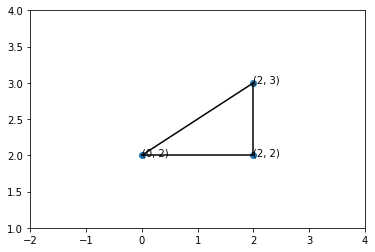

Квадрат Гипотенузы : 5 длина гипотенузы: 2.23606797749979


In [47]:
#Выведем Геометрически по Теореме пифагора
# Для этого добавим еще одну точку в массив так чтобы получился прямоугольный треугольник
data = np.array([[0,2],[2,3],[2,2]])
plt.margins(1, 1)   # отступы от осей
plt.scatter(data[:,0],data[:,1])
for i_x, i_y in data:
    plt.text(i_x, i_y, '({}, {})'.format(i_x, i_y)) #Добавляем подписи

def connectpoints(x,y,p1,p2):
    x1, x2 = x[p1], x[p2]
    y1, y2 = y[p1], y[p2]
    plt.plot([x1,x2],[y1,y2],'k-')

connectpoints(data[:,0],data[:,1],0,1) # промевед линию между точками (0,2) , (2,3) и (2,2)
connectpoints(data[:,0],data[:,1],1,2)
connectpoints(data[:,0],data[:,1],2,0)
plt.show()

#Катет (0,2)-(2,2) = 2
#Катет (2,3)-(2,2) = 1
# Найдем квадрат Гипотенузы по теореме Пифагора:
g_sqrt = (2**2) + (1**2)
print("Квадрат Гипотенузы : {} длина гипотенузы: {}".format(g_sqrt,np.sqrt(g_sqrt)))

In [48]:
# Вычислим Евклидовое расстояние с помощью библиотеки scipy
data = np.array([[0,2],[2,3]])

eudistance = spatial.distance.euclidean(data[:,0],data[:,1])
print("scipy", eudistance)

scipy 2.23606797749979


А теперь поработаем с метрикой  Городских кварталов


In [49]:
#Теперь посчитаем расстояние между ними, воспользовавшись формулой: d = (Summ|p-q|)
def manhattan(p,q):
  d = []
  for p_i, q_i in zip(p,q):
    d.append(abs(p_i - q_i))
  return (sum(d))

manhattan(data[:,0],data[:,1])

3

In [50]:
# А теперь сделаем тоже самое с помощью библиотеки scikit learn
from sklearn.metrics.pairwise import manhattan_distances
manhattan_distances(data[:,0].reshape(1, -1),data[:,1].reshape(1, -1))

array([[3.]])

In [51]:
# Вычислим  расстояние с помощью библиотеки scipy
manhattan = spatial.distance.cityblock(data[:,0],data[:,1])
print("scipy", manhattan)

scipy 3


Для работы с косинусным расстоянием возьмем 3 текста


In [52]:
# Define the documents
doc_trump = "Mr. Trump became president after winning the political election. Though he lost the support of some republican friends, Trump is friends with President Putin"

doc_election = "President Trump says Putin had no political interference is the election outcome. He says it was a witchhunt by political parties. He claimed President Putin is a friend who had nothing to do with the election"

doc_putin = "Post elections, Vladimir Putin became President of Russia. President Putin had served as the Prime Minister earlier in his political career"

documents = [doc_trump, doc_election, doc_putin]

# Scikit Learn
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Create the Document Term Matrix
count_vectorizer = CountVectorizer(stop_words='english')
count_vectorizer = CountVectorizer()
sparse_matrix = count_vectorizer.fit_transform(documents)

# OPTIONAL: Convert Sparse Matrix to Pandas Dataframe if you want to see the word frequencies.
doc_term_matrix = sparse_matrix.todense()
df = pd.DataFrame(doc_term_matrix, 
                  columns=count_vectorizer.get_feature_names(), 
                  index=['doc_trump', 'doc_election', 'doc_putin'])
df

,after,as,became,by,career,claimed,do,earlier,election,elections,friend,friends,had,he,his,in,interference,is,it,lost,minister,mr,no,nothing,of,outcome,parties,political,post,president,prime,putin,republican,russia,says,served,some,support,the,though,to,trump,vladimir,was,who,winning,witchhunt,with
doc_trump,1,0,1,0,0,0,0,0,1,0,0,2,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,2,0,1,1,0,0,0,1,1,2,1,0,2,0,0,0,1,0,1
doc_election,0,0,0,1,0,1,1,0,2,0,1,0,2,2,0,0,1,2,1,0,0,0,1,1,0,1,1,2,0,2,0,2,0,0,2,0,0,0,2,0,1,1,0,1,1,0,1,1
doc_putin,0,1,1,0,1,0,0,1,0,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1,1,2,1,2,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0


In [53]:
# Compute Cosine Similarity
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(df.loc['doc_trump'].values.reshape(1, -1) , df.loc['doc_election'].values.reshape(1, -1) ))

[[0.51480485]]


In [54]:
# Compute Cosine Similarity
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(df.loc['doc_trump'].values.reshape(1, -1) , df.loc['doc_putin'].values.reshape(1, -1) ))

[[0.38890873]]


In [55]:
# Compute Cosine Similarity
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(df.loc['doc_election'].values.reshape(1, -1) , df.loc['doc_putin'].values.reshape(1, -1) ))

[[0.38829014]]


In [56]:
print(manhattan_distances(df.loc['doc_election'].values.reshape(1, -1) , df.loc['doc_putin'].values.reshape(1, -1) ))
print(euclidean_distances(df.loc['doc_election'].values.reshape(1, -1) , df.loc['doc_putin'].values.reshape(1, -1) ))

[[41.]]
[[7.]]


In [57]:
print(manhattan_distances(df.loc['doc_trump'].values.reshape(1, -1) , df.loc['doc_putin'].values.reshape(1, -1) ))
print(euclidean_distances(df.loc['doc_trump'].values.reshape(1, -1) , df.loc['doc_putin'].values.reshape(1, -1) ))

[[31.]]
[[5.91607978]]


In [58]:
print(manhattan_distances(df.loc['doc_trump'].values.reshape(1, -1) , df.loc['doc_election'].values.reshape(1, -1) ))
print(euclidean_distances(df.loc['doc_trump'].values.reshape(1, -1) , df.loc['doc_election'].values.reshape(1, -1) ))

[[36.]]
[[6.4807407]]


# **ДЗ Лайт**

Задание 1

Даны следующие векторы в 2-х мерном Евклидовом пространстве: data = np.array([[0,2],[5,3],[1,4],[7,2],[1,1],[2,8],[0,8],[8,3],[6,2],[6,6],[1,6],[7,9]])

Отрисуйте точки на 2-х мерном графике, рассчитайте расстояние между каждой парой точек

от [0 2] до [5 3] Евклидово расстояние: 5.0990195135927845
от [5 3] до [1 4] Евклидово расстояние: 4.123105625617661
от [1 4] до [7 2] Евклидово расстояние: 6.324555320336759
от [7 2] до [1 1] Евклидово расстояние: 6.082762530298219
от [1 1] до [2 8] Евклидово расстояние: 7.0710678118654755
от [2 8] до [0 8] Евклидово расстояние: 2.0
от [0 8] до [8 3] Евклидово расстояние: 9.433981132056603
от [8 3] до [6 2] Евклидово расстояние: 2.23606797749979
от [6 2] до [6 6] Евклидово расстояние: 4.0
от [6 6] до [1 6] Евклидово расстояние: 5.0
от [1 6] до [7 9] Евклидово расстояние: 6.708203932499369
от [7 9] до [0 2] Евклидово расстояние: 9.899494936611665


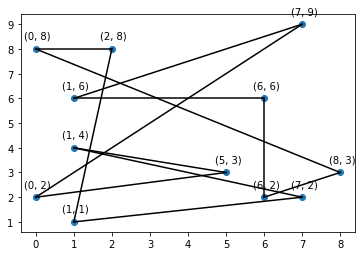

In [60]:
def connectpoints(x,y,p1,p2):
    x1, x2 = x[p1], x[p2]
    y1, y2 = y[p1], y[p2]
    plt.plot([x1,x2],[y1,y2],'k-')

data = np.array([[0,2],[5,3],[1,4],[7,2],[1,1],[2,8],[0,8],[8,3],[6,2],[6,6],[1,6],[7,9]])
# plt.margins(1, 1)   # отступы от осей
plt.scatter(data[:,0],data[:,1]) # диаграмма рассеяния

last_ind = len(data) - 1 # последний элемент
for i,e in enumerate(data):
  plt.text(e[0]-0.3, e[1]+0.4, f'({e[0]}, {e[1]})') #Добавляем подписи
  k = 0 if i == last_ind else i+1
  connectpoints(data[:,0],data[:,1],i,k) # проведем линию между точками 
  # Вычислим Евклидовое расстояние с помощью библиотеки scipy
  eudistance = spatial.distance.euclidean(e, data[k])
  print(f"от {e} до {data[k]} Евклидово расстояние:", eudistance)  

plt.show()

Задание 2 

Рассчитайте расстояние L1* между точками из массива data

*) Расстояние L1 так же известное как расстояние городских кварталов

In [65]:
for i,e in enumerate(data):
  k = 0 if i == last_ind else i+1
  # Вычислим расстояние L1 с помощью библиотеки scipy
  l1 = spatial.distance.cityblock(e, data[k])
  print(f"от {e} до {data[k]} расстояние L1:", l1)  

от [0 2] до [5 3] расстояние L1: 6
от [5 3] до [1 4] расстояние L1: 5
от [1 4] до [7 2] расстояние L1: 8
от [7 2] до [1 1] расстояние L1: 7
от [1 1] до [2 8] расстояние L1: 8
от [2 8] до [0 8] расстояние L1: 2
от [0 8] до [8 3] расстояние L1: 13
от [8 3] до [6 2] расстояние L1: 3
от [6 2] до [6 6] расстояние L1: 4
от [6 6] до [1 6] расстояние L1: 5
от [1 6] до [7 9] расстояние L1: 9
от [7 9] до [0 2] расстояние L1: 14


Задание 3 

Даны следующие векторы в пятимерном Евклидовом пространстве: data = np.array([[0,2,4,5,4],[5,3,1,1,2],[1,4,1,3,9],[7,2,0,1,5],[1,1,1,1,1],[2,8,5,9,1],[0,8,0,8,0],[8,3,1,2,1],[6,2,4,2,1],[6,6,6,6,6],[1,6,8,9,1],[7,9,1,2]]) 

Рассчитайте расстояние между каждой парой точек

In [66]:
# В последнем векторе даты - 4 измерения, добавил 0
data = np.array([[0,2,4,5,4],[5,3,1,1,2],[1,4,1,3,9],[7,2,0,1,5],[1,1,1,1,1],[2,8,5,9,1],[0,8,0,8,0],[8,3,1,2,1],[6,2,4,2,1],[6,6,6,6,6],[1,6,8,9,1],[7,9,1,2,0]])
for i, a in enumerate(data[:-1]):
  for b in data[i+1:]:
    euclid = spatial.distance.euclidean(a,b)
    l1 = spatial.distance.cityblock(a,b)
    print(f'От {a} до {b}. Расстояние: Евклидово - {euclid}, L1 - {l1}')


От [0 2 4 5 4] до [5 3 1 1 2]. Расстояние: Евклидово - 7.416198487095663, L1 - 15
От [0 2 4 5 4] до [1 4 1 3 9]. Расстояние: Евклидово - 6.557438524302, L1 - 13
От [0 2 4 5 4] до [7 2 0 1 5]. Расстояние: Евклидово - 9.055385138137417, L1 - 16
От [0 2 4 5 4] до [1 1 1 1 1]. Расстояние: Евклидово - 6.0, L1 - 12
От [0 2 4 5 4] до [2 8 5 9 1]. Расстояние: Евклидово - 8.12403840463596, L1 - 16
От [0 2 4 5 4] до [0 8 0 8 0]. Расстояние: Евклидово - 8.774964387392123, L1 - 17
От [0 2 4 5 4] до [8 3 1 2 1]. Расстояние: Евклидово - 9.591663046625438, L1 - 18
От [0 2 4 5 4] до [6 2 4 2 1]. Расстояние: Евклидово - 7.3484692283495345, L1 - 12
От [0 2 4 5 4] до [6 6 6 6 6]. Расстояние: Евклидово - 7.810249675906654, L1 - 15
От [0 2 4 5 4] до [1 6 8 9 1]. Расстояние: Евклидово - 7.615773105863909, L1 - 16
От [0 2 4 5 4] до [7 9 1 2 0]. Расстояние: Евклидово - 11.489125293076057, L1 - 24
От [5 3 1 1 2] до [1 4 1 3 9]. Расстояние: Евклидово - 8.366600265340756, L1 - 14
От [5 3 1 1 2] до [7 2 0 1 5]. Р

Задание 4

Не проводя расчетов, попробуйте оценить для какого случая расстояние будет больше для 2-х векторов в пятнадцатимерном пространстве: 1)[0,2,4,50,4,1,3,0,1,2,3,4,1,2,3] 2)[5,3,1,1,2,3,5,6,7,8,21,4,5,7,8,9] a) Евклидовая метрика б) Метрика городских кварталов

In [67]:
a = [0,2,4,50,4,1,3,0,1,2, 3,4,1,2,3] 
b = [5,3,1, 1,2,3,5,6,7,8,21,4,5,7,8]
# Метрика городских кварталов всегда больше или равна Евклидовой метрике
spatial.distance.euclidean(a,b), spatial.distance.cityblock(a,b)

(54.27706698044764, 114)

# **ДЗ Задание ПРО**

Попробуйте отрисовать круг в пространстве L1

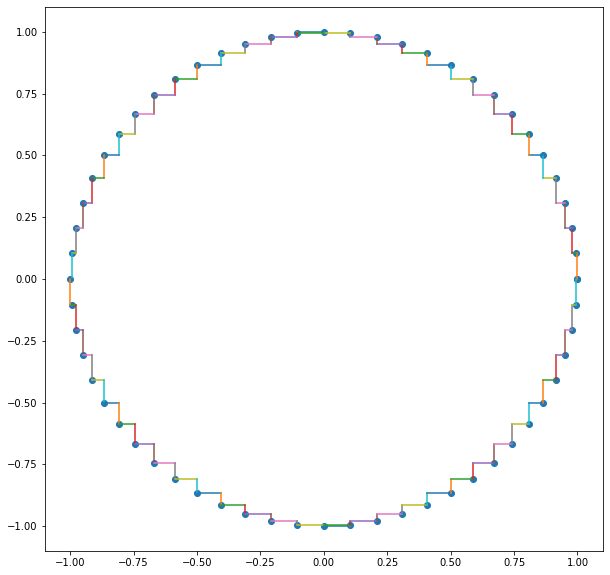

In [116]:
length = 61
alpha = np.linspace(0, 2 * np.pi, length)
r = 1
x = r * np.cos(alpha)
y = r * np.sin(alpha)
data = np.array(list(zip(x, y)))
plt.figure(figsize=(10, 10))
plt.scatter(data[:,0],data[:,1]) # диаграмма рассеяния

last_ind = len(data) - 1 # последний элемент
for i in range(length-1):
  k = 0 if i == last_ind else i+1
  if x[i] > 0 and y[i] > 0:
    plt.plot((x[i], x[i+1]) , (y[i],y[i]))
    plt.plot((x[i+1], x[i+1]) , (y[i],y[i+1]))
  elif x[i] < 0 and y[i] < 0:
    plt.plot((x[i], x[i+1]) , (y[i],y[i]))
    plt.plot((x[i+1], x[i+1]) , (y[i],y[i+1]))
  else:
    plt.plot((x[i], x[i-1]) , (y[i],y[i]))
    plt.plot((x[i], x[i]) , (y[i],y[i+1]))

plt.show()
